# Import the libraries

In [21]:
#Importing the Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib

In [23]:
from pathlib import Path

In [2]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow --ignore-installed --user

  Using cached tensorflow-2.8.0-cp37-cp37m-macosx_10_14_x86_64.whl (217.4 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached six-1.16.0-py2.py3-none-any.whl (11 kB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp37-cp37m-macosx_10_14_x86_64.whl (1.6 MB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached protobuf-3.19.4-cp37-cp37m-macosx_10_9_x86_64.whl (960 kB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached keras-2.8.0-py2.py3-none-any.whl (1.4 MB)
  Using cached wrapt-1.14.0-cp37-cp37m-macosx_10_9_x86_64.whl (34 kB)
  Using cached typing_extensions-4.1.1-py3-none-any.whl (26 kB)
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached tensorboard-2.8.0-py3-none-any.whl (5.8 MB)
  Using cached libclang-13.0.0-py2.py3-none-macosx_10_9_x86_64.whl (13.0 MB)
  Using cached flatbuffers-2.0-py2.py3-none-any.whl (26 kB)
  U

In [5]:
from sklearn. preprocessing import MinMaxScaler

In [6]:
from sklearn.model_selection import TimeSeriesSplit

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

In [8]:
import matplotlib. dates as mandates

In [9]:
from sklearn import linear_model

In [10]:
from keras.layers import LSTM, Dense, Dropout

In [13]:
from keras.models import Sequential

In [15]:
import keras.backend as K

In [16]:
from keras.callbacks import EarlyStopping

In [18]:
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [19]:
from tensorflow.keras.optimizers import Adam

# Import the stock data

In [24]:
#load .csv file as DataFrame
df = pd.read_csv(Path('../ML_mock_up/ENPH_Price.csv'))
df.head()
#check the null value in the column
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [47]:
#Get the Dataset
df = pd.read_csv(Path('../ML_mock_up/ENPH_Price.csv'),na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1.02,1.05,1.01,1.05,1.05,445900
2017-01-04,1.09,1.15,1.05,1.15,1.15,903000
2017-01-05,1.19,1.19,1.11,1.12,1.12,308700
2017-01-06,1.12,1.14,1.08,1.11,1.11,259700
2017-01-09,1.10,1.11,1.08,1.11,1.11,180000


In [82]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,1.020000,1.050000,1.010000,1.050000,1.050000,445900
2017-01-04,1.090000,1.150000,1.050000,1.150000,1.150000,903000
2017-01-05,1.190000,1.190000,1.110000,1.120000,1.120000,308700
2017-01-06,1.120000,1.140000,1.080000,1.110000,1.110000,259700
2017-01-09,1.100000,1.110000,1.080000,1.110000,1.110000,180000
...,...,...,...,...,...,...
2022-02-28,157.399994,167.949997,157.399994,166.699997,166.699997,5368900
2022-03-01,167.539993,172.869995,163.520004,170.600006,170.600006,3539800
2022-03-02,169.880005,169.880005,159.529999,163.889999,163.889999,3473300


In [48]:
print(df.shape)

(1302, 6)


In [31]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
#Print the shape of Dataframe  and Check for Null Values
print(“Dataframe Shape: “, df.shape)
print(“Null Value Present: “, df.isnull().values.any())

SyntaxError: invalid character in identifier (3428834736.py, line 2)

In [49]:
# Plot "AdjClose" and "Date" of ENPH
plt.figure(figsize=(20, 10))

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

Text(0.5, 1.0, 'Adj Close Prices of ENPH')

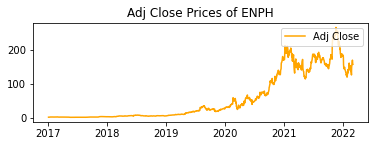

In [50]:
plt.subplot(2,1,1)
plt.plot(df['Adj Close'],  label='Adj Close', color="orange" )
plt.legend(loc="upper right")
plt.title('Adj Close Prices of ENPH')

# Setting the Target Variable and Selecting the Features

In [51]:
#Set Target Variable
y = df["Adj Close"]
print(type(y))

<class 'pandas.core.series.Series'>


In [53]:
y = pd.DataFrame(df["Adj Close"])
print(type(y))

<class 'pandas.core.frame.DataFrame'>


In [55]:
# X = df.drop(columns = "Adj Close")
features = ["Open","High","Low","Volume"]
print(type(features))

<class 'list'>


# Scaling

In [56]:
data_scaler = MinMaxScaler()

In [57]:
feature_transform = data_scaler.fit_transform(df[features])

In [58]:
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)

In [59]:
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
2017-01-03,0.001192,0.001207,0.001385,0.006358
2017-01-04,0.001453,0.001562,0.001539,0.014658
2017-01-05,0.001825,0.001704,0.001770,0.003867
2017-01-06,0.001564,0.001526,0.001654,0.002978
2017-01-09,0.001490,0.001420,0.001654,0.001531


# Creating a Training Set and a Test Set 

In [76]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [80]:
print(type(X_train.shape[0]))
print(X_train.shape[0])

<class 'int'>
1184


In [77]:
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


In [81]:
print(X_train)

                Open      High       Low    Volume
Date                                              
2017-01-03  0.001192  0.001207  0.001385  0.006358
2017-01-04  0.001453  0.001562  0.001539  0.014658
2017-01-05  0.001825  0.001704  0.001770  0.003867
2017-01-06  0.001564  0.001526  0.001654  0.002978
2017-01-09  0.001490  0.001420  0.001654  0.001531
...              ...       ...       ...       ...
2021-09-09  0.606236  0.580976  0.613742  0.035358
2021-09-10  0.604857  0.582396  0.604624  0.035167
2021-09-13  0.589622  0.568944  0.590621  0.033714
2021-09-14  0.595098  0.574020  0.602239  0.026294
2021-09-15  0.581725  0.557090  0.582695  0.041852

[1184 rows x 4 columns]


In [83]:
print(type(X_train.shape[1]))
print(X_train.shape[1])

<class 'int'>
4


In [78]:
print(type(y_train))

<class 'numpy.ndarray'>


# Data Processing For LSTM

In [84]:
#Process the data for LSTM
trainX =np.array(X_train)

In [85]:
print(trainX)

[[0.00119198 0.00120674 0.00138499 0.00635835]
 [0.00145273 0.00156167 0.00153888 0.01465761]
 [0.00182523 0.00170364 0.00176971 0.0038673 ]
 ...
 [0.5896223  0.5689441  0.59062057 0.0337145 ]
 [0.59509798 0.57401955 0.6022391  0.026294  ]
 [0.58172537 0.55708963 0.58269537 0.04185216]]


In [86]:
trainX.shape

(1184, 4)

In [87]:
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [88]:
print(type(X_train))

<class 'numpy.ndarray'>


# Building the LSTM Model for Stock Market Prediction

In [92]:
!pip install pydot

  Using cached pydot-1.4.2-py2.py3-none-any.whl (21 kB)


In [93]:
!pip install graphviz

     |████████████████████████████████| 46 kB 2.4 MB/s eta 0:00:011


In [94]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


# Training the Stock Market Prediction Model

In [95]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
148/148 [==============================] - 1s 2ms/step - loss: 5481.1821
Epoch 2/100
148/148 [==============================] - 0s 2ms/step - loss: 5312.6787
Epoch 3/100
148/148 [==============================] - 0s 2ms/step - loss: 5077.7329
Epoch 4/100
148/148 [==============================] - 0s 2ms/step - loss: 4758.9863
Epoch 5/100
148/148 [==============================] - 0s 2ms/step - loss: 4364.5610
Epoch 6/100
148/148 [==============================] - 0s 2ms/step - loss: 3917.4421
Epoch 7/100
148/148 [==============================] - 0s 2ms/step - loss: 3447.7896
Epoch 8/100
148/148 [==============================] - 0s 2ms/step - loss: 2985.2505
Epoch 9/100
148/148 [==============================] - 0s 2ms/step - loss: 2553.8208
Epoch 10/100
148/148 [==============================] - 0s 2ms/step - loss: 2169.5278
Epoch 11/100
148/148 [==============================] - 0s 2ms/step - loss: 1840.2065
Epoch 12/100
148/148 [==============================] - 0s 2ms/

148/148 [==============================] - 0s 2ms/step - loss: 7.4150
Epoch 99/100
148/148 [==============================] - 0s 1ms/step - loss: 7.3662
Epoch 100/100
148/148 [==============================] - 0s 1ms/step - loss: 7.3185


# LSTM Prediction

In [96]:
#LSTM Prediction
y_pred = lstm.predict(X_test)

In [100]:
y_pred

array([[155.02441 ],
       [157.85966 ],
       [154.3581  ],
       [154.30098 ],
       [155.06653 ],
       [158.7485  ],
       [155.84628 ],
       [152.95241 ],
       [152.3303  ],
       [151.51585 ],
       [150.88727 ],
       [153.44797 ],
       [151.40565 ],
       [147.82872 ],
       [148.9305  ],
       [158.56822 ],
       [157.31503 ],
       [158.57591 ],
       [165.17966 ],
       [171.54828 ],
       [172.85849 ],
       [172.72762 ],
       [173.25597 ],
       [181.86153 ],
       [181.26834 ],
       [178.91281 ],
       [177.19814 ],
       [177.05055 ],
       [176.96016 ],
       [209.50655 ],
       [212.15137 ],
       [220.31425 ],
       [224.56184 ],
       [224.70808 ],
       [224.1905  ],
       [226.30376 ],
       [228.49529 ],
       [229.75487 ],
       [228.01396 ],
       [221.12798 ],
       [229.15865 ],
       [237.25197 ],
       [235.83371 ],
       [233.19623 ],
       [239.57451 ],
       [240.51079 ],
       [245.07681 ],
       [252.8

In [101]:
y_pred.shape

(118, 1)

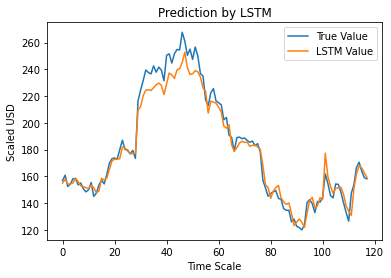

In [99]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()